## **Chapter02. 신경망을 위한 수학 기초 (58~130p)**

### **Chapter02.00 개념 정리**

* **신경망 파라미터를 결정하는 방법**
  * **지도학습**
    * 신경망의 가중치와 편향을 정하기 위해 미리 주어진 ***학습 데이터(훈련 데이터) 존재***
    * 학습 데이터에서 가중치와 편향을 결정하는 것을 ***학습***이라 함
  * **비지도학습**
* **신경망 학습 방법**
  * **모델의 최적화**
    * 신경망이 계산한 예측값과 정답 사이의 오차를 계산하고, 학습 데이터에서 나온 오차들의 합이 최소가 되도록 가중치와 편향을 결정
  * **오차 총합(비용함수) ➜ $C_T$**
    * 예측값과 정답 사이의 오차를 제곱(제곱 오차)하고, 학습 데이테 전체의 제곱오차를 합한 것

* **수학의 최소제곱법 / 통계의 회귀분석**
  * 제곱오차를 이용하여 파라미터를 결정하는 방법

### **Chapter02.01 신경망의 필수 함수 (58p)**

* **1차 함수**
  * 신경망에서 노드가 받는 ***'가중입력'***은 1차 함수 관계로 표현
  * $y = ax + b (a,b 는 상수, a \neq 0)$
  * $a$는 기울기, $b$는 절편
  * 1차 함수는 ***독립변수가 여러 개***일 때도 있음
    * $y = ax_1 + bx_2 + c (a, b, c는 상수, a \neq 0, b \neq 0)$
  * **독립변수**
    * $x$가 주어지면 $y$가 결정되는 관계일 때,  $y$는 $x$의 함수
       * $y = f(x)$ ➜ $x = 독립변수$ $y = 종속변수$

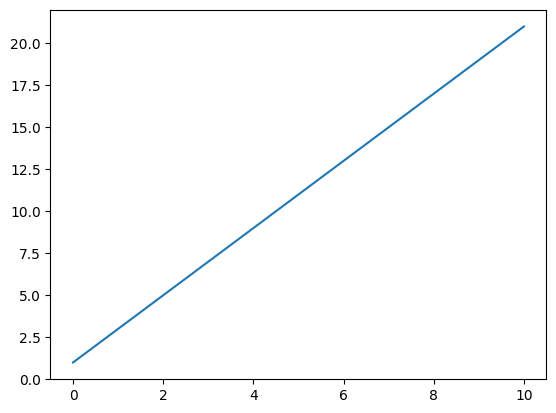

In [ ]:
# 1차 함수 그래프
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0, 11, 1)
y = (2 * x) + 1

plt.plot(x, y)
plt.show()

* **2차 함수**
  * $y = ax^2 + bx + c (a, b, c는 상수, a \neq 0)$
  * $a$가 양수라면 아래로 볼록한 그래프로 ***최솟값*** 존재

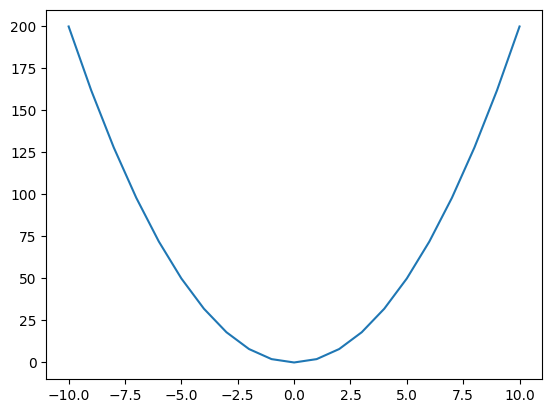

In [ ]:
# 2차 함수 그래프
x = np.arange(-10, 11, 1)
y = 2 * (x**2)

plt.plot(x, y)
plt.show()

* **계단 함수 (Step Function)**
  * $f(x) =\begin{cases}0 & ( x < 0)  \\1 & ( x \geq 0) \end{cases} $

  * 원점에서 불연속
  * 원점에서 ***미분 불가능*** 특징 때문에 신경망의 활성화 함수로 자주 사용 되지 않음
  * 응용수학에서는 선형 응답 함수

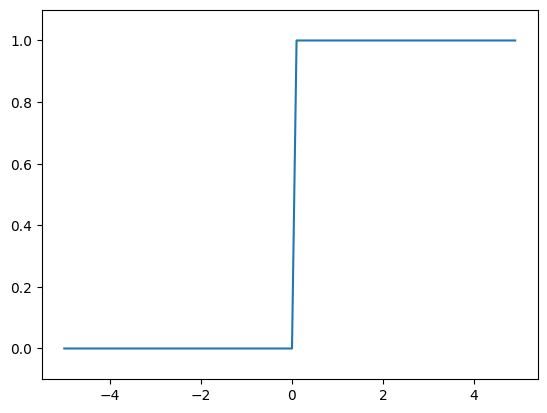

In [ ]:
# 계단 함수 그래프
def step_function(x):
  return np.array(x >= 0, dtype=int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)

plt.ylim(-0.1, 1.1)
plt.plot(x, y)
plt.show()

* **지수함수**
  * **$y = a^x (a는 양의 상수, a \neq 1)$**
  * 상수 $a$는 지수함수의 ***밑(base)***
  * 밑의 값으로 중요한 것은 ***자연상수 $e$***
    * $e$ = 2.718281828.....

* **시그모이드 함수 (Sigmoid Function)**
  * **$\sigma(x) = \frac{1}{1+e^{-x}} = \frac{1}{1+exp(-x)}$**
  * 자연상수를 포함하는 지수함수를 분모로 갖는 함수
  * 신경망에서 자주 사용하는 활성화 함수
  * 어디서나 ***미분 가능***
  * 함숫값이 0과 1 사이라 ***함숫값으로 확률 계산 가능***

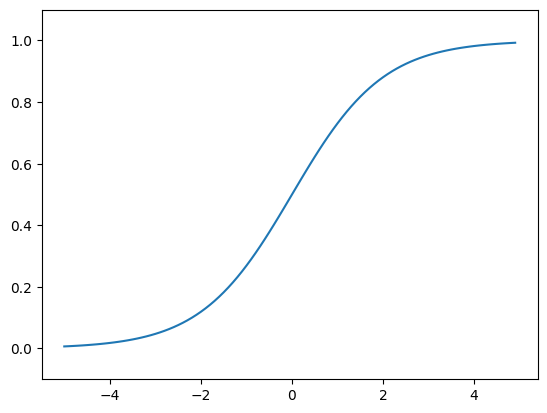

In [ ]:
# 시그모이드 함수 그래프
def sigmoid_function(x):
  return 1 / (1 + np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid_function(x)

plt.ylim(-0.1, 1.1)
plt.plot(x, y)
plt.show()

* **정규분포 (Normal Distribution)**
  * 신경망의 가중치 및 편향의 초깃값을 구할 때 도움
  * 이 분포를 따르는 ***정규분포 난수를 초깃값으로 사용***하면 신경망 계산 시 좋은 결과 얻을 수 있음
  * 정규분포란 ***확률밀도함수를 따르는 확률분포***를 말함
  * 자연환경에서 나타나는 데이터의 분포를 설명하는데 사용
  * 특징
    * 종모양의 형태를 가지며 ***좌우 대칭***인 모양
    * 처음부터 끝까지의 ***넓이값은 항상 1***
  * 표기법
    * $N(\mu, \sigma ^ 2)$
  * 예) 평균이 100, 표준편차가 10인 group의 정규분포는 $N(100, 10 ^ 2)$를 따름


* **확률밀도함수 (PDF : Probability Density Function)**
  * **$f(x) = \frac{1}{\sqrt{2\pi\sigma}} \cdot e^{-\frac{(x - \mu)^2}{2\sigma^2}}$**
    * $\mu = 기댓값(평균값)$
    * $\sigma = 표준편차$


* **표준정규분포 (Standard Normal Distribution)**
  * 기존 정규분포를 표준정규분포로 바꾸는 과정을 표준화라고 함
  * 확률밀도함수 공식이 너무 복잡하여 ***표준정규분포로 표준화(Standardization) 진행***해서 문제 해결
    * $Z = \frac{X - \mu}{\sigma}$
      * $Z$ = 표준화된 값 ($Z-Score$)
      * $X$ = 원시 데이터 값
      * $\mu$ = 원시 데이터의 평균
      * $\sigma$ = 원시 데이터의 표준편차

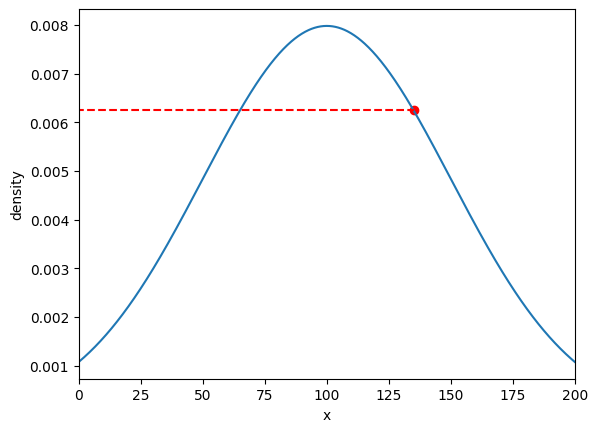

In [ ]:
## 확률밀도함수 그래프
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

# 평균 = 100, 표준편차 = 50인 정규분포 객체 정의
norm_dist = scipy.stats.norm(loc = 100, scale = 50)

x = np.linspace(0, 200, 1000)
density = norm_dist.pdf(x)
plt.plot(x, density)

# x = 135인점 표시
plt.scatter(135, norm_dist.pdf(135), c = 'r')
plt.plot([-10, 135], [norm_dist.pdf(135), norm_dist.pdf(135)], 'r--')

plt.xlabel('x')
plt.ylabel('density')
plt.xlim(0, 200)

plt.show()

### **Chapter02.02 신경망의 이해를 돕는 수열과 점화식 (67p)**

* **수열**
  * 숫자의 열
  * 정렬하는 숫자 하나하나를 ***항***이라 함
  * **유한수열**
    * 유한개 항 수를 갖는 수열
    * 유한수열의 마지막 항은 ***말항 (final term, 끝항)***이라 함
    * 신경망은 유한수열
  * 예) 수열 1, 3, 5, 7, 9
    * 유한수열
    * 첫 번쨰 항 = 1
    * 말항 = 9
    * 항 수 = 5

* **수열의 일반항**
  * 주어진 수열의 $n$번쨰 수를 $n$을 이용한 식으로 나타낸 것
  * 수열의 $n$번째 수 ➜ $a_n$
  * 수열 전체 ➜ {$a_n$}
  * 예) 짝수열의 일반항 ➜ $a_n = 2n$
  * 예) 홀수열의 일반항 ➜ $b_n = 2n-1$
  * $l층$의 $j$번째 노드의 출력값 ➜ $a_j^l$
  * 신경망에서 가중 입력과 출력은 수열로 간주

* **수열과 점화식**
  * 1항 $a_1$과 인접한 2개의 항 $a_n, a_{n+1}$으로 수열 {$a_n$}을 표현한 관계식을 점화식이라 함
  * 예) 1항이 $a_1 = 1$이고, 관계식이 $a_{n+1} = a_n + 2$로 주어졌을 때 수열 표현
    * $a_1 = 1, a_2 = a_{1+1} = a_1 + 2 = 1 + 2 = 3, a_3 = a_{2+1} = a_2 + 2 = 3 + 2 = 5, \cdots$

* **수열의 귀납적 정의**
    * 이웃에 있는 항의 관계로 표현
    * 예) 짝수열 {$a_n$} 수열의 귀납적 정의
      * 1항 ➜ $a_1 = 2$
      * 점화식 ➜ $a_{n+1} = a_n + 2$

* **연립 점화식**
   * 여러 수열이 몇 가지 관계식으로 연결된 것
   * 신경망에서는 모든 노드의 입력과 출력이 연립 점화식으로 연결
   * $\begin{cases}a_{n+1} = a_n + 2b_n + 2\\b_{n+1} = 2a_n + 3b_n + 1\\ \end{cases}$

### **Chapter02.03 신경망에서 많이 사용하는 시그마 기호 (72p)**

* **시그마 기호의 의미**
  * 수열의 합을 간결하게 표현하는 것
  * 예) 수열 $a_n$의 합 ➜ 1항부터 $n$ 항까지 수열 $a_n$의 합계
    * $\displaystyle\sum_{k=1}^{n} a_k = a_1 + a_2 + a_3 + \cdots  + a_{n-1} + a_n$

* **시그마 기호의 특징**
  * ***선형성 특징***
    * 연산의 분해, 결합, 확장 가능
  * $\displaystyle\sum_{k=1}^{n} (a_k + b_k)$ = $\displaystyle\sum_{k=1}^{n} a_k + \displaystyle\sum_{k=1}^{n} b_k $
  * $\displaystyle\sum_{k=1}^{n} ca_k $ = $c \displaystyle\sum_{k=1}^{n} a_k$ ($c$는 상수)

### **Chapter02.04 신경망의 이해를 돕는 벡터 (75p)**

* **유향선분과 벡터**
  * 두 점 $A, B$가 있을 때 $A$에서 $B$로 향하는 방향을 갖는 선분 $AB$를 유향선분이라 함 ($A$ 시작점, $B$ 종점)
  * 유향선분 속성
    * 점 $A$의 위치
    * $B$에 관한 방향
    * $AB$의 길이

* **벡터 (Vector)**
  * ***크기 (스칼라)와 방향***을 갖는 양이며 화살표선으로 표현
  * $\overrightarrow{AB}$

* **벡터의 성분 표시**
  * 벡터의 화살표선을 좌표 평면애 배치하여 표현
  * 시작점을 원점으로 했을 때 종점의 좌표가 성분 표시
  * $\vec{a} = (a_1, a_2)$

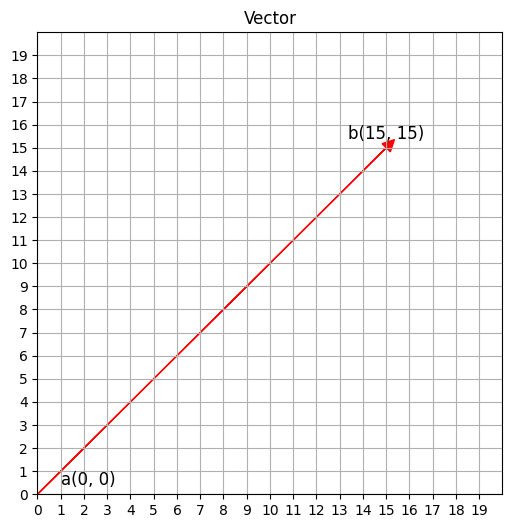

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

a = [0,0]
b = [15,15]

plt.figure(figsize=(6,6))
plt.xlim(0, 20)
plt.ylim(0, 20)
plt.xticks(ticks=np.arange(0, 20, step=1))
plt.yticks(ticks=np.arange(0, 20, step=1))

plt.arrow(a[0], a[1], b[0], b[1], head_width = .5, head_length = .5, color = 'red')
plt.text(a[0] + 1, a[1] + 1, "a(0, 0)", fontsize = 12, ha = "left", va = "top")
plt.text(b[0], b[1] + 1, "b(15, 15)", fontsize = 12, ha = "center", va = "top")

plt.title("Vector")
plt.grid()
plt.show()

* **벡터의 크기**
  * 벡터를 나타내는 ***화살표선의 길이***
  * 벡터 $\vec a$ 크기 표현 ➜ $\vert \vec a \vert$
  * 예) $\vec a = (3, 4)$의 길이
    * $\vert \vec a \vert = \sqrt{3^2 + 4^2} = 5$

In [ ]:
a = np.array([3, 4])
np.linalg.norm(a)

5.0

* **벡터의 내적**
  * ***크기 (스칼라)만 고려***한 벡터의 곱셈
  * 신경망의 입력과 출력은 모두 벡터 형태이며, ***입력과 가중치의 내적을 출력***으로 내보냄
  * 내적은 "***두 벡터가 어느 정도로 같은 방향을 향하고 있는가***"를 나타냄 ➜ 벡터의 내적값이 크면 방향이 비슷함
  * $\vec a \cdot \vec b = \vert \vec a \vert \vert \vec b \vert cos\theta$

* **코시-슈바르츠 부등식 (CBS 부등식)**
  * 임의의 $cos\theta$ ➜ $-1 \leq cos \theta \leq 1$ 범위를 가짐
  * $-\vert \vec a \vert \vert \vec b \vert \leq \vert \vec a \vert \vert \vec b \vert cos\theta \leq \vert \vec a \vert \vert \vec b \vert$ ➜ $-\vert \vec a \vert \vert \vec b \vert \leq \vec a \cdot \vec b \leq \vert \vec a \vert \vert \vec b$
  * 두 개의 벡터의 크기를 일정하게 할 때 관계의 특징
    * $\theta = 180^\circ (cos\theta = -1)$ ➜ 두 벡터가 반대 방향이라면 내적은 최솟값
    * $0^\circ < \theta < 180^\circ (-1 < cos\theta < 1)$ ➜ 두 벡터가 평행하지 않다면 내적은 반대 방향일 때와 평행일 때 사이의 중간값
    * $\theta = 0^\circ (cos\theta = 1)$ ➜ 두 벡터가 같은 방향이라면 내적은 최댓값
  * 이 특징은 ***경사하강법의 기본 원리***

* **내적의 성분 표시**
  * $\vec a \cdot \vec b =a_1b_1 + a_2b_2 $
  * 예) $\vec a = (2, 3)$이고 $\vec b = (5, 1)$이라면 내적은
    * $\vec a \cdot \vec b = (2 \cdot 5) + (3 \cdot 1) = 10 + 3 = 13$

* **벡터의 일반화**
  * 벡터는 평면과 입체 공간의 특징을 ***임의의 차원에 그래로 확장 가능***

* **법선 벡터 (Normal Vector)**
  * 평면과 수직인 벡터
  * 법선 벡터에 따라서 ***변형력의 방향과 크기가 달라짐***

### **Chapter02.05 신경망의 이해를 돕는 행렬 (85p)**

* **행렬 (Matrix)**
  * 수와 식을 사각 형태의 배열로 나열한 것
  * 행과 열 수가 같은 행렬은 ***정사각행렬 (=정방행렬)*** ➜ $X = \begin{bmatrix}1&2\\3&4\\ \end{bmatrix}$
  * **열벡터** ➜ $X = \begin{bmatrix}3\\1\\4\end{bmatrix}$
  * **행벡터** ➜ $Y = \begin{bmatrix}1&2&3\\\end{bmatrix}$
  * $m$행 $n$열 행렬
   * $A_{m,n} =
 \begin{bmatrix}
  a_{1,1} & a_{1,2} & \cdots & a_{1,n} \\
  a_{2,1} & a_{2,2} & \cdots & a_{2,n} \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  a_{m,1} & a_{m,2} & \cdots & a_{m,n}
 \end{bmatrix}$

* **단위행렬**
  * 성분 $a_{ij} (i==j)$가 1이고, 다른 성분이 0인($I$, 항등행렬) 정사각행렬 (정방행렬)
  * 보통 $E$로 표시 ➜ 2 X 2 단위행렬 == 2차 단위행렬
  * $E = \begin{bmatrix}1& 0\\0&1\\ \end{bmatrix}$

* **행렬의 상등**
  * 두 행렬 $A, B$의 대응하는 각 성분이 같을 때
  * $A = B$
  * $A = \begin{bmatrix}1&2\\3&4\\ \end{bmatrix}$, $B = \begin{bmatrix}1&2\\3&4\\ \end{bmatrix}$

* **행렬의 합과 차, 상수 배**
  * 두 행렬 $A, B$의 합과 차는 ***같은 위치 성분***끼리의 합과 차로 정의
  * 행렬의 상수 배는 각 성분에 해당 상수를 곱한 것으로 정의
  * 예) $A = \begin{bmatrix}2&7\\1&8\\ \end{bmatrix}$, $B = \begin{bmatrix}2&8\\1&3\\ \end{bmatrix}$
  * $A + B = \begin{bmatrix}2 + 2&7 + 8\\1 + 1&8 + 3\\ \end{bmatrix} = \begin{bmatrix}4&15\\2&11\\ \end{bmatrix}$
  * $A - B = \begin{bmatrix}2 - 2&7 - 8\\1 - 1&8 - 3\\ \end{bmatrix} = \begin{bmatrix}0&-1\\0&5\\ \end{bmatrix}$
  * $3A = 3\begin{bmatrix}2&7\\1&8\\ \end{bmatrix} = \begin{bmatrix}3\times 2&3\times 7\\3\times 1 & 3\times 8\\\end{bmatrix} = \begin{bmatrix}6&21\\3&24\\ \end{bmatrix}$

* **행렬 곱샘**
  * 두 행렬 $A, B$의 곱 $AB$는 $A$의 $i$행을 행벡터로, $B$의 $j$열을 열벡터로 생각했을 떄,  행벡터와 열벡터의 내적을 $i$행 $j$열의 성분으로 하는 행렬
  * 행렬의 곱셈에서는 ***교환법칙 성립하지 않음*** ➜ $AB \neq BA$

* **아다마르 곱 (Hadamard Product)**
  * 같은 행과 열 수를 갖는 행렬 $A, B$에서 같은 위치의 성분을 곱한 행렬을 ***'행렬 $A, B$의 아다마르 곱'***이라고 함
  * $A = \begin{bmatrix}2&7\\1&8\\ \end{bmatrix}$, $B = \begin{bmatrix}2&8\\1&3\\ \end{bmatrix}$
  * $A \circ B = \begin{bmatrix}2 \times 2&7 \times 8\\1 \times 1&8 \times 3\\ \end{bmatrix} = \begin{bmatrix}4&56\\1&24\\ \end{bmatrix}$

* **전치행렬 (Transposed Matrix)**
  * 행렬 $A$의 $i$행과 $j$열의 값을 $j$행 $i$열로 바꿔 얻는 행렬을 행렬 $A$의 전치행렬이라고 함
  * $A^T$
  * $A = \begin{bmatrix}1\\2\\ \end{bmatrix}$, $A^T = \begin{bmatrix}1 & 2\\ \end{bmatrix}$



* 예) $A = \begin{bmatrix}1&4&1\\4&2&1\\ \end{bmatrix}$, $B = \begin{bmatrix}2&7&1\\8&2&8\\ \end{bmatrix}$
  * $A^TB = \begin{bmatrix}1&4\\4&2\\ 1&1\end{bmatrix} \begin{bmatrix}2&7&1\\8&2&8\\ \end{bmatrix} = \begin{bmatrix}1 \cdot 2 + 4 \cdot 8&1 \cdot 7 + 4 \cdot 2 &1 \cdot 1 + 4 \cdot 8\\4 \cdot 2 + 2 \cdot 8 & 4 \cdot 7 + 2 \cdot 2 & 4 \cdot 1 + 2 \cdot 8\\ 1 \cdot 2 + 1 \cdot 8 & 1 \cdot 7 + 1 \cdot 2 & 1 \cdot 1 + 1 \cdot 8\end{bmatrix} = \begin{bmatrix}34&15&33\\24&32&20\\10&9&9\end{bmatrix} $
  * $A \circ B = \begin{bmatrix}1 \times 2&4 \times 7 & 1 \times 1 \\4 \times 8 & 2 \times 2 & 1 \times 8\\ \end{bmatrix} = \begin{bmatrix}2&28&1\\32&4&8\\ \end{bmatrix}$

### **Chapter02.06 신경망을 위한 미분의 기본 (90p)**

* **도함수**
  * $f^\prime(x) = \displaystyle\lim_{Δx \to 0} \frac{f(x + Δx) - f(x)}{Δx} = \frac{dy}{dx}$
  * $f^\prime(x^n) = n \cdot x^{n-1}$
  * $f^\prime(e^{-x}) = -e^{-x}$
  * 어떤 함수 안에 포함된 값 각각이 ***0에 한없이 가까워지는 극한값 (미분계수)***을 구하는 함수
  * $\displaystyle\lim_{Δx \to 0}$ ➜ $Δx (delta)$라는 수가 ***한없이 0에 가깝다***는 의미
  * 함수 $f(x)$의 도함수 $f^\prime(x)$를 구한다는 것은 "***함수 $f(x)$를 미분한다***"는 뜻
  * $f^\prime(x)$ ➜ 해당 그래프 ***접선의 기울기*** 표현
    * $f^\prime(x)$ 식의 값을 계산할 수 있다면 미분 가능
    * 연속되는 형태의 그래프를 갖는 함수는 미분 가능

* **미분의 성질**
  * 미분의 선형성
  * $\{f(x) + g(x)\}^\prime = f^\prime(x) + g^\prime(x)$ ➜ 함수 합의 미분은 각 함수를 미분한 합과 같음
  * $\{cf(x)\}^\prime = cf^\prime(x)$  ($c$는 상수) ➜ 상수를 곱한 함수의 미분은 미분한 함수에 상수를 곱한 것과 같음

* **분수 함수와 시그모이드 함수의 미분**
  * **분수 함수 미분 공식** ➜ $\{\frac{1}{f(x)}^\prime\} = -\frac{f(x)^\prime}{\{f(x)\}^2}$
  * **시그모이드 함수 미분식** ➜ $\sigma^\prime(x) = \sigma(x)(1-\sigma(x)) = \sigma(x) - \sigma(x)^2$

* **최솟값과 필요조건**
  * **함수 $f(x)$가 $x = a$일 때 최솟값이라면 $f^\prime(a) = 0$**
  * $f^\prime(a) = 0$는 함수 $f(x)$가 $x=a$에서 최솟값이 되기 위한 필요 조건

    ➜ 이는 ***접선의 기울기가 0이더라도 꼭 최솟값이라는 보장이 없음***을 의미
  * 경사하강법은 접선의 기울기가 낮은 쪽으로 계속 이동시켜서 최솟값 구함
    * 함수 전체의 최솟값과 값이 커지거나 작아질 때 발생하는 ***극솟값/극댓값을 혼동***할 수 있어 주의 요함

### **Chapter02.07 신경망을 위한 편미분의 기본 (97p)**

* **다변수 함수**
  * ***독립변수가 2개 이상***인 함수 ➜ $f(x, y) = x^2 + y^2$

* **편미분 (Partial Derivative)**
  * 다변수 함수를 미분하는 것
  * 단, 변수가 여러개 있으므로 ***미분할 특정 변수 명시***해서 미분 진행
  * 예) $z = f(x, y)$에서 변수 $x$를 미분하고, $y$를 상수로 취급하는 **'$x$에 관한 편미분'**을 진행
    * $\frac{∂z}{∂x} = \frac{∂f(x, y)}{∂x} = \displaystyle\lim_{Δx \to 0} \frac{f(x + Δx, y) - f(x, y)}{Δx}$

* **다변수 함수와 최솟값의 필요조건**
  * 미분 가능한 일변수 함수 $y = f(x)$의 ***어떤 $x$가 최솟값인 필요조건은 도함수가 0이 되는 것*** ➜ 다변함수 마찬가지
  * $\frac{∂f(x, y)}{∂x} = 0, \frac{∂f(x, y)}{∂y} = 0 \qquad 함수 z = f(x, y)가$ 최솟값이 되는 필요조건
    * 역시나 필요조건일 뿐 미분한 값이 0이라도 최솟값이 된다고 보장 할 수 없음

* **라그랑주 승수법**
  * 제약 조건 함수 $g$를 만족하는 어떤 함수 $f$의 최솟값이나 최댓값이 제약 조건 함수 $g$와 함수 $f$가 접하는 점에 존재할 수 있다는 개념을 이용하는 것

### **Chapter02.08 연쇄법칙 (101p)**

* **신경망과 합성함수 (composite function)**
  * 예) $f(z) = (2-y)^2$은 함수 $f(u) = 2-y$와 함수 $f(z)=f(u)^2$의 합성함수이다.

* **연쇄법칙 (Chain Rule)**
  * 합성함수에 대한 미분 법칙

* **일변수 함수의 연쇄법칙**
  * 일변수 함수 $y = f(u)$의 변수  $u$가 일변수 함수 $u = g(x)$일 떄, 합성함수 $f(g(x))$의 도함수는 간단히 계산 가능
  * $\frac{dy}{dx} = \frac{dy}{du} \frac{du}{dx}$ ➜ ***합성함수 미분 공식*** $or$ ***연쇄법칙***
  * 단, 합성함수의 약분 규칙은 일반 $dx, dy$를 제곱했을 시 사용 불가

* **다변수 함수의 연쇄법칙**
  * $Z = f(u, v)$라는 함수가 있고, $u = g(x, y), v = h(x, y)$ 라는 함수라고 갖어했을 시 다변수 함수의 연쇄법칙
    * $\frac{∂z}{∂x} = \frac{∂z}{∂u}\frac{∂u}{∂x} + \frac{∂z}{∂v}\frac{∂v}{∂x}$

### **Chapter02.09 다변수 함수의 근사식 (106p)**

* **일변수 함수의 근사식 (Approximation)**
  * $\Delta x$는 0에 근접해 있는 **'0과 거의 비슷한 값'**이므로 **'0'으로 바꿔도 큰 차이가 생기지 않을 것** ➜ ***극한의 개념을 없앤 다음 근사식 사용***
  * $f^{\prime} \approx \frac{f(x + Δx) - f(x)}{Δx}$
  * **일변수 함수의 근사식 (선형근사)**
    * $f(x+Δx) \approx f(x) + f^\prime(x )Δx$
  * 이 때, 어떤 $x$값이 상수 $a$라는 값에 근접해 있다면
    * $\Delta x = x - a$

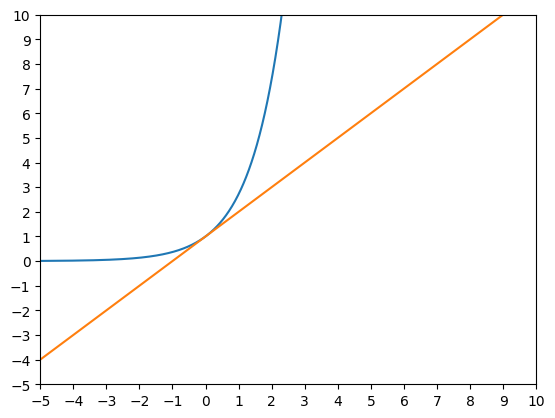

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-10, 11, 0.01)
y1 = np.exp(x)
y2 = 1 + x
plt.plot(x, y1)
plt.plot(x, y2)

plt.ylim(-5, 10)
plt.xlim(-5, 10)
plt.xticks(ticks=np.arange(-5, 11, step=1))
plt.yticks(ticks=np.arange(-5, 11, step=1))

plt.show()

* **다변수 함수의 근사식**

  * **$x, y$를 차례로 $\Delta x, \Delta y$ 만큼 변화시켰을 때의 함수 $z = f(x, y)$의 변화**
    * $f(x + Δx, y + Δy) ≈ f(x, y) + \frac{\partial f(x, y)}{\partial x}Δx + \frac{\partial f(x, y)}{\partial y}Δy$
    * $\frac{ f(x + \Delta x, y + \Delta y) - f(x, y)}{Δz} ➜ \Delta z = f(x + \Delta x, y + \Delta y) - f(x, y)$
    * $Δz ≈ \frac{∂z}{∂x}Δx + \frac{∂z}{∂y}Δy$
  * 변수 추가 시 **근사식 뒤에 붙이면** 가능

* **근사식의 벡터 표현**
  * $∇z = \begin{pmatrix}\frac{∂z}{∂w}& \frac{∂z}{∂x}&\frac{\partial z}{∂y}\end{pmatrix}$, $Δx = (Δw, Δx, Δy)$

* **테일러 급수 (Taylor series)**
  * 지금까지의 ***근사식을 일반화한 식***


* $Δ$ (Delta, 델타)
  * 변수가 하나인 함수에서의 변화량
  * 미분 연산자

* $∇$ (nabla, 나블라/ Del, 델)
  * 변수가 여러개인 함수에서의 변화량
  * 미분 연산자, 차원마다 편미분한 벡터로 볼수도 있음


### **Chapter02.10 경사하강법의 의미와 식 (110p)**

* ***함수의 최솟값이 되는 점***을 찾는 것은 응용수학에서 가장 중요한 역활 중 하나 ➜ 대표적으로 ***경사하강법*** 존재


* **경사하강법의 원리**
  * $z = f(x, y)$가 있을 때 함수 $z$를 최소화하는 $x, y$ 구하기 방법
    * $\frac{∂f(x, y)}{∂x} = 0, \frac{∂f(x, y)}{∂y} = 0$ 관계를 만족한다는 사실 이용 (어디까지나 필요조건에 불과)
    * 위 식은 쉽게 풀리지 않는다는 것이 문제이기에 ***그래프 상의 점을 조금씩 움직여*** 함수의 최솟값인 점 찾아내야 함 ➜ **경사하강법**

* **근사식과 내적의 관계**
  * $Δz = \frac{\partial f(x, y)}{∂x}Δx + \frac{∂f(x, y)}{∂y}Δy$ 관계식의 우변은 ***두 벡터의 내적 형태***
  * $\nabla z = \begin{pmatrix}\frac{∂f(x, y)}{∂x},& \frac{∂f(x, y)}{∂y}\end{pmatrix}⋅\Delta x = (Δx, \Delta y)$ ➜ $∇z \cdot Δx$

* **내적의 최솟값**
  * $0$이 아닌 두 벡터 $\vec a, \vec b$에서 $\vec a, \vec b$의 크기를 고정했다고 생각하면, 이때 내적 $\vec a \cdot \vec b$가 최솟값이 되려면 ***$\vec b$의 방향이 $\vec a$와 반대여야 함***
  * 내적 $\vec a \cdot \vec b$가 최솟값이 되는 벡터 $\vec b$의 방향은 $\vec b$가 다음의 식을 만족할 때
    * $\vec b = -k\vec a (k는 양의 정수)$ ➜ 이 식은 경사하강법의 수학적 기반이 됨

* **이변수 함수의 경사하강법 기본 식**
  * 내적의 최솟값은 두 벡터의 반대여야 하므로 $Δz$의 최솟값은 ***두 벡터가 반대 방향일 때*** 구할 수 있음
  * $(Δx, Δy) = -η\begin{pmatrix}\frac{∂f(x, y)}{∂x},& \frac{∂f(x, y)}{∂y}\end{pmatrix}$ ***($η$는 작은 값을 갖는 양의 정수***)
    * 위 경사하강법 식을 만족하는 $(\Delta x, \Delta y)$가 있다면 점 $(x, y)$에서 점 $(x + Δx, y + Δy)$로 이동했을 때의 최솟값이 된다.
  * 우변에 있는 벡터 $\begin{pmatrix}\frac{∂f(x, y)}{∂x},& \frac{∂f(x, y)}{∂y}\end{pmatrix}$를 함수 $f(x, y)$ 안 점 $(x, y)$의 ***기울기 (Gradient)***라 함

* **경사하강법 사용하기**
  01. 가장 가파른 기울기에 해당하는 방향으로 조금씩 이동하면서 점 (위치)를 찾음
  02. 1번 절차를 반복해 그래프의 바닥, 즉 함수의 최솟값인 점에 도달하는 것을 확인

* **삼변수 이상인 함수에 경사하강법 확장하기**
  * $η$가 가장 작은 값을 갖는 상수고 변수 $(x_1, x_2, \cdots, x_n)$이 $(x_1+Δx_1, x_2+Δx_2, ⋯, x_n+Δx_n)$으로 변할 때 함수 $f$가 최솟값인 점은 다음의 관계를 만족할 때 성립
  * $(Δx_1, Δx_2, ⋯, Δx_n) = -η\begin{pmatrix}\frac{∂f}{∂x_1}, \frac{∂f}{∂x_2}, \cdots, \frac{∂f}{∂x_n}\end{pmatrix}$
  * 벡터 함수 $f$의 점 $(x_1, x_2, \cdots, x_n)$의 기울기 ➜ $\begin{pmatrix}\frac{∂f}{∂x_1}, \frac{∂f}{∂x_2}, \cdots, \frac{∂f}{∂x_n}\end{pmatrix}$

* **$∇$(델, 나블라) 연산자**
  * 일변수 함수의 미적분 개념을 기반으로 ***다변수 함수의 미적분 개념을 일반화하는 '벡터 해석'***
  * $∇f = \begin{pmatrix}\frac{∂f}{∂x_1}, \frac{∂f}{∂x_2}, \cdots, \frac{∂f}{∂x_n}\end{pmatrix}$
  * $(Δx_1, Δx_2, ⋯, Δx_n) = -η\begin{pmatrix}\frac{∂f}{∂x_1}, \frac{∂f}{∂x_2}, \cdots, \frac{∂f}{∂x_n}\end{pmatrix}$ ➜ $(Δx_1, Δx_2, ⋯, Δx_n) = -η\nabla f$ ➜ $Δx = -η\nabla f$
  * 우변의 벡터 $(Δx_1, Δx_2, ⋯, Δx_n)$는 ***변위 벡터***라 부름
    * 실제 경로와 상관없이 시작점과 끝점을 가장 짧게 연결하는 벡터로 주로 ***어떤 방향에 이르는 최단 거리 강조***

* **$\eta$(에타)의 의미와 경사하강법의 주의점**
  * $\eta$값에 따라 다음에 이동할 점을 결정하기에 사람이 이동하는 ***'보폭'으로 묘사***할 수 있음
   * 단, 보폭이 너무 크면 최솟값인 점을 뛰어넘을 수 있고, 보폭이 너무 작으면 최솟값을 찾는 데 오랜 시간이 걸릴 수 있음
   * 신경망에서 상수 $\eta$는 학습률 ($lr$)이라고 함
   * 신경망 계산의 시행착오를 통해 ***더 나은 값***을 찾아야 함

### **Chapter02.12 최적화 문제 및 회귀분석 (124p)**

* **최적화란?**
  * 데이터를 분석하려고 수학 모델을 만들 때, 모델은 보통 파라미터로 규정한다. 그럼 ***'파라미터는 어떻게 결정할 것인가?'*** 이것이 수학에서의 최적화 문제라고 하는 주제이다.

* **회귀분석 (Regression Analysis)**
  * 여러 변수로 구성된 자료에서 ***특정 변수 하나와 나머지 변수의 관계를 설명***하는 방법

* **단순 회귀분석**
  * 변수 2개로 구성한 자료 분석
  * 상관도의 점들 사이에 직선을 긋고, 이 직선의 방정식에서 두 변수의 관계를 알아보는 분석 방법
  * **회귀직선** ➜ $y = px+q (p, q는 상수)$
    * 점들 사이를 나누는 직선
    * 1차 식으로 표현하고, 이를 ***회귀방정식***이라 함
    * 우변의 $x$를 입력값이나 원인을 나타내는 ***독립변수***, 좌변의 $y$를 출력값이나 결과를 나타내는 ***종속변수***라고 함
    * 상수 $p, q$는 이 회귀분석 모델을 정하는 ***상수 (파라미터)*** ➜ $p$는 회귀계수, $q$는 절편

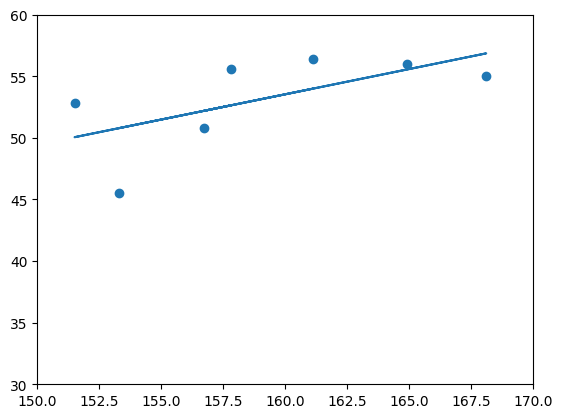

In [7]:
# 회귀분석 상관도(산점도)
import matplotlib.pyplot as plt
import numpy as np

height = np.array([153.3, 164.9, 168.1, 151.5, 157.8, 156.7, 161.1])
weight = np.array([45.5, 56.0, 55.0, 52.8, 55.6, 50.8, 56.4])
y = 0.41 * height - 12.06

plt.xlim(150, 170)
plt.ylim(30, 60)
plt.scatter(height, weight)
plt.plot(height, y)

* **예제**
  * 키 $x_k$, 체중 $y_k$, 예측값 $y_k = px_k + q$
    * 키 153.3, 체중 45.5, 예측값 $153.3p + q$
    * 예측값의 오차 $e_k = y_k - (px_k + q)$

* **제곱오차**
  * 오차 $e_k$의 값으로는 양수나 음수 모두 사용 가능
  * 그런데, 음수가 있으면 데이터 전체에 있는 $e_k$ 값을 합했을 때 0이 될 수 있음
  
    ➜ 오차 측정하려면 ***예측값과 실제값 사이의 차이를 제곱***해서 더해야 함
  * $C_T = \frac{1}{2} \{y_k - (px_k + q)\}^2$
  * 제곱오차의 합이 최솟값이 되는 $p,q$의 해 구하기
  * 제곱오차의 합 ➜ 오차함수, 손실함수, 비용함수 등

In [8]:
# 상관계수
np.corrcoef(height, weight)

array([[1.        , 0.62943512],
       [0.62943512, 1.        ]])